In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from PIL import Image
from keras_preprocessing.image import ImageDataGenerator
from pathlib import Path

In [2]:
dir_ = Path('C:/Users/sbrrd/Desktop/153.반려동물 안구질환 데이터/01.데이터/1.Training/원천데이터/TL1/개/안구/일반')
test_dir_ = Path('C:/Users/sbrrd/Desktop/153.반려동물 안구질환 데이터/01.데이터/2.Validation/원천데이터/VS/개/안구/일반/')

types = ('**/*.jpg', '**/*.png','**/*.jpeg')
files_grabbed = []
test_files_grabbed = []
for files in types:
    files_grabbed.extend(dir_.glob(files))
    test_files_grabbed.extend(test_dir_.glob(files))

def proc_img(filepath):
    """
   		이미지데이터의 경로와 label데이터로 데이터프레임 만들기
    """

    labels = []
    for i in range(len(filepath)):
        if(str(filepath[i]).split("\\")[-2] == '무'):
            labels.append(str(filepath[i]).split("\\")[-2])
        else:
            labels.append(str(filepath[i]).split("\\")[-3])

    filepath = pd.Series(filepath, name='Filepath').astype(str)
    labels = pd.Series(labels, name='Label')

    # 경로와 라벨 concatenate
    df = pd.concat([filepath, labels], axis=1)

    # index 재설정
    df = df.sample(frac=1,random_state=0).reset_index(drop = True)

    return df

df = proc_img(files_grabbed)
test_df = proc_img(test_files_grabbed)
df.head(5)

,Filepath,Label
0,C:\Users\sbrrd\Desktop\153.반려동물 안구질환 데이터\01.데이...,무
1,C:\Users\sbrrd\Desktop\153.반려동물 안구질환 데이터\01.데이...,궤양성각막질환
2,C:\Users\sbrrd\Desktop\153.반려동물 안구질환 데이터\01.데이...,비궤양성각막질환
3,C:\Users\sbrrd\Desktop\153.반려동물 안구질환 데이터\01.데이...,안검염
4,C:\Users\sbrrd\Desktop\153.반려동물 안구질환 데이터\01.데이...,유루증


In [3]:
test_df.head(5)

,Filepath,Label
0,C:\Users\sbrrd\Desktop\153.반려동물 안구질환 데이터\01.데이...,백내장
1,C:\Users\sbrrd\Desktop\153.반려동물 안구질환 데이터\01.데이...,비궤양성각막질환
2,C:\Users\sbrrd\Desktop\153.반려동물 안구질환 데이터\01.데이...,무
3,C:\Users\sbrrd\Desktop\153.반려동물 안구질환 데이터\01.데이...,안검염
4,C:\Users\sbrrd\Desktop\153.반려동물 안구질환 데이터\01.데이...,결막염


In [4]:
#데이터 라벨링된 결과
print(f'Number of pictures: {df.shape[0]}\n')
print(f'Number of different labels: {len(df.Label.unique())}\n')
print(f'Labels: {df.Label.unique()}\n')

#데이터 라벨링된 결과
print(f'Number of pictures: {test_df.shape[0]}\n')
print(f'Number of different labels: {len(test_df.Label.unique())}\n')
print(f'Labels: {test_df.Label.unique()}')

Number of pictures: 128327

Number of different labels: 8

Labels: ['무' '궤양성각막질환' '비궤양성각막질환' '안검염' '유루증' '백내장' '결막염' '색소침착성각막염']

Number of pictures: 16059

Number of different labels: 8

Labels: ['백내장' '비궤양성각막질환' '무' '안검염' '결막염' '유루증' '색소침착성각막염' '궤양성각막질환']


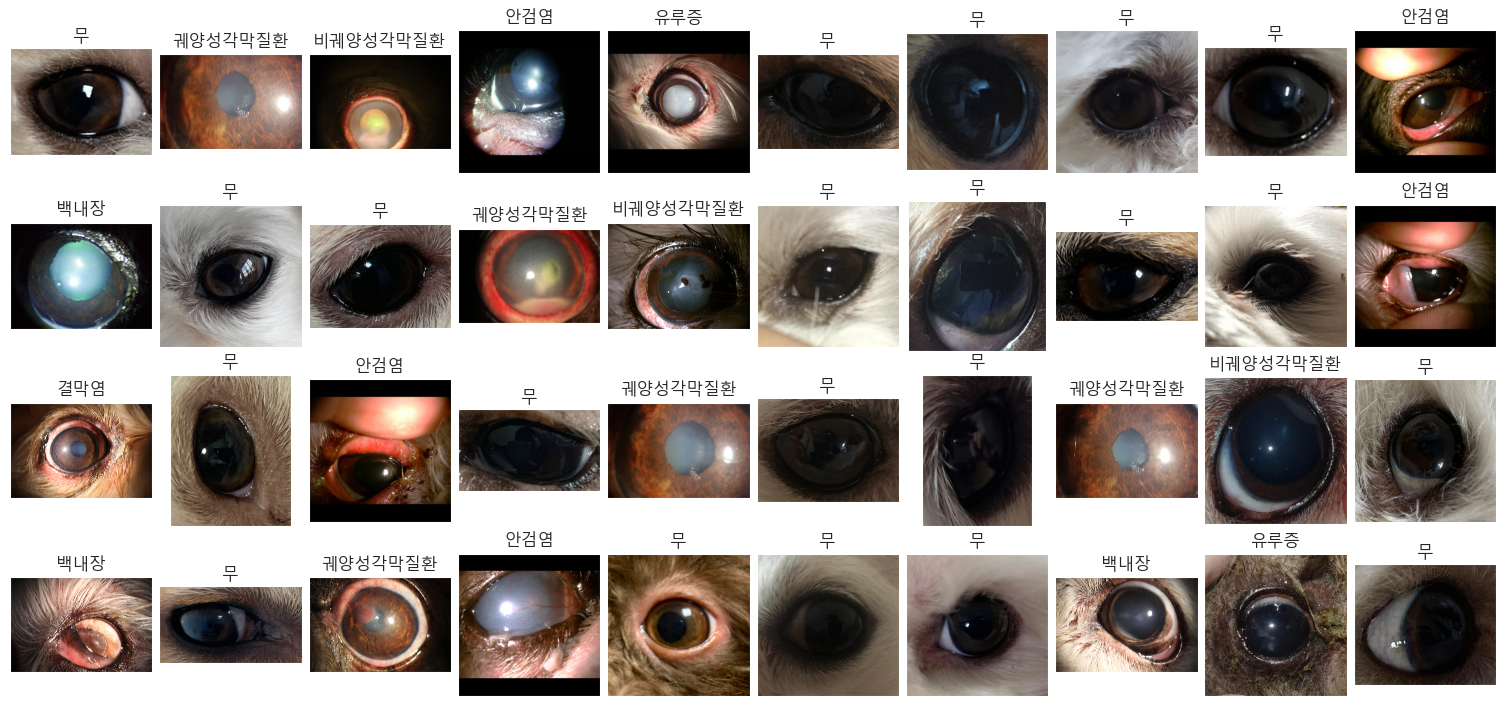

In [9]:
plt.rc("font", family="Malgun Gothic")

fig, axes = plt.subplots(nrows=4, ncols=10, figsize=(15, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(Image.open(df.Filepath[i]))
    ax.set_title(df.Label[i], fontsize = 12)
plt.tight_layout(pad=0.5)
plt.show()

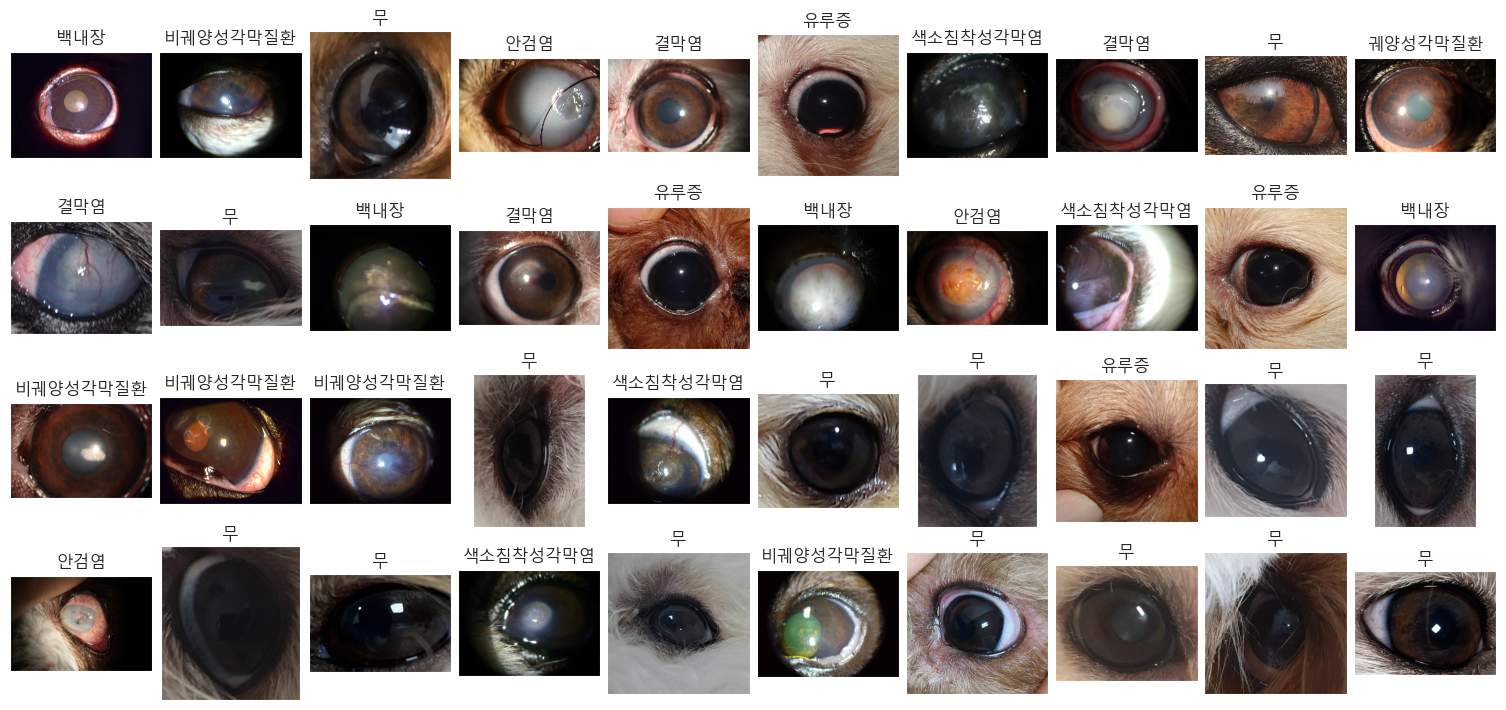

In [10]:
plt.rc("font", family="Malgun Gothic")

fig, axes = plt.subplots(nrows=4, ncols=10, figsize=(15, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(Image.open(test_df.Filepath[i]))
    ax.set_title(test_df.Label[i], fontsize = 12)
plt.tight_layout(pad=0.5)
plt.show()

In [8]:
def create_gen():
    # 생성기 및 데이터 증강으로 이미지 로드
    train_generator = ImageDataGenerator(
        preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
        validation_split=0.2
    )

    test_generator = ImageDataGenerator(
        preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
    )

    train_images = train_generator.flow_from_dataframe(
        dataframe=df,
        x_col='Filepath', # 파일위치 열이름
        y_col='Label', # 클래스 열이름
        target_size=(224, 224), # 이미지 사이즈
        color_mode='rgb', # 이미지 채널수
        class_mode='categorical', # Y값(Label값)
        batch_size=32,
        shuffle=True, # 데이터를 섞을지 여부
        seed=0,
        subset='training', # train 인지 val인지 설정
        rotation_range=30, # 회전제한 각도 30도
        zoom_range=0.15, # 확대 축소 15%
        width_shift_range=0.2, # 좌우이동 20%
        height_shift_range=0.2, # 상하이동 20%
        shear_range=0.15, # 반시계방햐의 각도
        horizontal_flip=True, # 좌우 반전 True
        fill_mode="nearest"
        # 이미지 변경시 보완 방법 (constant, nearest, reflect, wrap) 4개 존재
    )

    val_images = train_generator.flow_from_dataframe(
        dataframe=df,
        x_col='Filepath',
        y_col='Label',
        target_size=(224, 224),
        color_mode='rgb',
        class_mode='categorical',
        batch_size=32,
        shuffle=True,
        seed=0,
        subset='validation',
        rotation_range=30,
        zoom_range=0.15,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.15,
        horizontal_flip=True,
        fill_mode="nearest"
    )

    test_images = test_generator.flow_from_dataframe(
        dataframe=test_df,
        x_col='Filepath',
        y_col='Label',
        target_size=(224, 224),
        color_mode='rgb',
        class_mode='categorical',
        batch_size=32,
        shuffle=False
    )

    return train_generator,test_generator,train_images,val_images,test_images

def get_model(model):
    kwargs =    {'input_shape':(224, 224, 3),
                'include_top':False,
                'weights':'imagenet',
                'pooling':'avg'}

    pretrained_model = model(**kwargs)
    pretrained_model.trainable = False # 레이어를 동결 시켜서 훈련중 손실을 최소화 한다.

    x = tf.keras.layers.Dense(1024, activation='relu')(pretrained_model.output)
    outputs = tf.keras.layers.Dense(8, activation='softmax')(x)
    model = tf.keras.Model(inputs=pretrained_model.input, outputs=outputs)
    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model


In [ ]:
callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                           patience=5),
             tf.keras.callbacks.ModelCheckpoint(filepath='model_f.h5',
                                             monitor='val_loss',
                                             save_best_only=True)]


train_generator,test_generator,train_images,val_images,test_images=create_gen()



with tf.device('/device:GPU:0'):
    model = get_model(tf.keras.applications.DenseNet201)
    history = model.fit(train_images,validation_data=val_images,epochs=10,callbacks=callbacks)

Found 102662 validated image filenames belonging to 8 classes.
Found 25665 validated image filenames belonging to 8 classes.
Found 16059 validated image filenames belonging to 8 classes.
Epoch 1/10
3209/3209 [==============================] - 4595s 1s/step - loss: 0.6991 - accuracy: 0.7237 - val_loss: 0.6366 - val_accuracy: 0.7445
Epoch 2/10
3209/3209 [==============================] - 4513s 1s/step - loss: 0.6093 - accuracy: 0.7532 - val_loss: 0.6197 - val_accuracy: 0.7504
Epoch 3/10
3209/3209 [==============================] - 4500s 1s/step - loss: 0.5733 - accuracy: 0.7648 - val_loss: 0.5957 - val_accuracy: 0.7572
Epoch 4/10
3209/3209 [==============================] - 4496s 1s/step - loss: 0.5487 - accuracy: 0.7740 - val_loss: 0.5725 - val_accuracy: 0.7651
Epoch 5/10
2238/3209 [===================>..........] - ETA: 18:08 - loss: 0.5265 - accuracy: 0.7817

In [6]:
from keras.saving.save import load_model
model = load_model('model_f.h5')
model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                              

In [9]:
callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                           patience=5),
             tf.keras.callbacks.ModelCheckpoint(filepath='model_f.h5',
                                             monitor='val_loss',
                                             save_best_only=True)]
train_generator,test_generator,train_images,val_images,test_images=create_gen()

with tf.device('/device:GPU:0'):
    history = model.fit(train_images,validation_data=val_images,epochs=10,callbacks=callbacks)

Found 102662 validated image filenames belonging to 8 classes.
Found 25665 validated image filenames belonging to 8 classes.
Found 16059 validated image filenames belonging to 8 classes.
Epoch 1/10
3209/3209 [==============================] - 4592s 1s/step - loss: 0.4988 - accuracy: 0.7909 - val_loss: 0.5694 - val_accuracy: 0.7617
Epoch 2/10
3209/3209 [==============================] - 4530s 1s/step - loss: 0.4833 - accuracy: 0.7963 - val_loss: 0.5669 - val_accuracy: 0.7650
Epoch 3/10
3209/3209 [==============================] - 4736s 1s/step - loss: 0.4728 - accuracy: 0.7999 - val_loss: 0.5701 - val_accuracy: 0.7653
Epoch 4/10
3209/3209 [==============================] - 4767s 1s/step - loss: 0.4639 - accuracy: 0.8034 - val_loss: 0.5801 - val_accuracy: 0.7628
Epoch 5/10
3209/3209 [==============================] - 4750s 1s/step - loss: 0.4541 - accuracy: 0.8063 - val_loss: 0.5777 - val_accuracy: 0.7652
Epoch 6/10
3209/3209 [==============================] - 4756s 1s/step - loss: 0.446

In [10]:
from sklearn.metrics import classification_report,accuracy_score
import numpy as np
pred = model.predict(test_images)
pred = np.argmax(pred,axis=1)

502/502 [==============================] - 551s 1s/step


In [11]:
labels = train_images.class_indices
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

y_test = list(test_df.Label)
acc = accuracy_score(y_test,pred)
print(f'Accuracy on the test set: {acc * 100:.2f}%')

Accuracy on the test set: 65.50%


In [14]:
pred = model.predict(test_images)  # 테스트 이미지에 대한 예측 값을 가져옵니다.
pred_top3 = np.argsort(pred, axis=1)[:, -3:]  # 상위 3개 예측 값의 인덱스를 가져옵니다.
y_test = list(test_df.Label)  # 테스트 데이터의 실제 레이블을 가져옵니다.

count = 0  # 정확한 예측의 개수를 저장할 변수를 초기화합니다.
arr_count = 0  # 테스트 데이터의 인덱스를 추적하기 위한 변수를 초기화합니다.

top3_values = []  # 상위 3개 예측 값들을 저장할 리스트를 생성합니다.

# 각 행에 대해 예측된 상위 3개 값의 인덱스를 해당하는 레이블로 변환하여 리스트에 추가합니다.
for indices in pred_top3:
    top3_values.append([labels[idx] for idx in indices])

# 각 예측 값에 대해 실제 값과 비교하여 정확한 예측인지 확인합니다.
for values in top3_values:
    for value in values:
        if value == y_test[arr_count]:
            count += 1  # 정확한 예측의 개수를 증가시킵니다.
            break
    arr_count += 1  # 다음 테스트 데이터의 인덱스로 이동합니다.

accuracy = count / len(y_test)  # 정확도를 계산합니다.
print(f"Accuracy on the test set: {accuracy * 100:.2f}%")  # 정확도를 백분율로 출력합니다.

502/502 [==============================] - 537s 1s/step
Accuracy on the test set: 89.27%


C:\Users\sbrrd\anaconda3\envs\eye_diag_venv\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 44208 (\N{HANGUL SYLLABLE GYEOL}) missing from current font.
  fig.canvas.draw()
C:\Users\sbrrd\anaconda3\envs\eye_diag_venv\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 47561 (\N{HANGUL SYLLABLE MAG}) missing from current font.
  fig.canvas.draw()
C:\Users\sbrrd\anaconda3\envs\eye_diag_venv\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 50684 (\N{HANGUL SYLLABLE YEOM}) missing from current font.
  fig.canvas.draw()
C:\Users\sbrrd\anaconda3\envs\eye_diag_venv\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 44452 (\N{HANGUL SYLLABLE GWE}) missing from current font.
  fig.canvas.draw()
C:\Users\sbrrd\anaconda3\envs\eye_diag_venv\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 50577 (\N{HANGUL SYLLABLE YANG}) missing from current font.
  fig.canvas.draw()
C:\Users\sbrrd\anaconda3\envs\eye_diag_venv\lib\site-packages\seaborn\utils.py:80: UserWarn

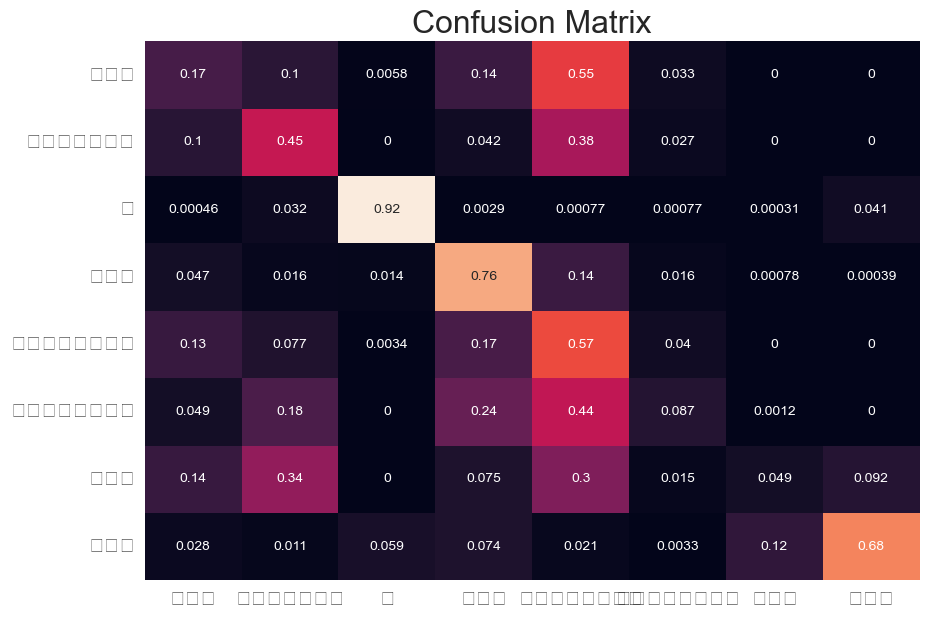

In [12]:

from sklearn.metrics import confusion_matrix
import seaborn as sns

cf_matrix = confusion_matrix(y_test, pred, normalize='true')
plt.figure(figsize = (10,7))
sns.heatmap(cf_matrix, annot=True, xticklabels = sorted(set(y_test)), yticklabels = sorted(set(y_test)),cbar=False)
plt.title('Confusion Matrix', fontsize = 23)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()